# Support Vector Classifier

### Importing Libraries

In [0]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

### Importing the data

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Segregating variables: Independent and Dependent Variables

In [3]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

### Splitting the data into train set and the test set

In [0]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 10)

### Implementing Support Vector Classifer

In [0]:
#importing Support Vector Classifier
from sklearn.svm import SVC


In [6]:
# Creating instance of Linear Regresssion
svc = SVC()

# Fitting the model
svc.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
# Predicting over the Train Set
train_predict = svc.predict(train_x)
k = svc.score(train_x, train_y)
print('Training Score', k )

Training Score 0.8398203592814372


In [8]:
# Predicting over the Test
test_predict = svc.predict(test_x)
k = svc.score(test_x, test_y)
print('Test score    ', k )

Test score     0.7309417040358744


### Tuning the model with respect to C

In [0]:
# takes model as input and returns score of that model
def score(model):
  model.fit(train_x, train_y)
  k1 = model.score(test_x, test_y)
  k2 = model.score(train_x, train_y)
  return k1,k2

In [0]:
# Defining range of the parameter
z = range(1,2000,20)
z = [i/2000 for i in z]

score_test = []
score_train = []

for i in z:
  svc = SVC(C = i)
  k1, k2 = score(svc)
  score_test.append(k1)
  score_train.append(k2)  

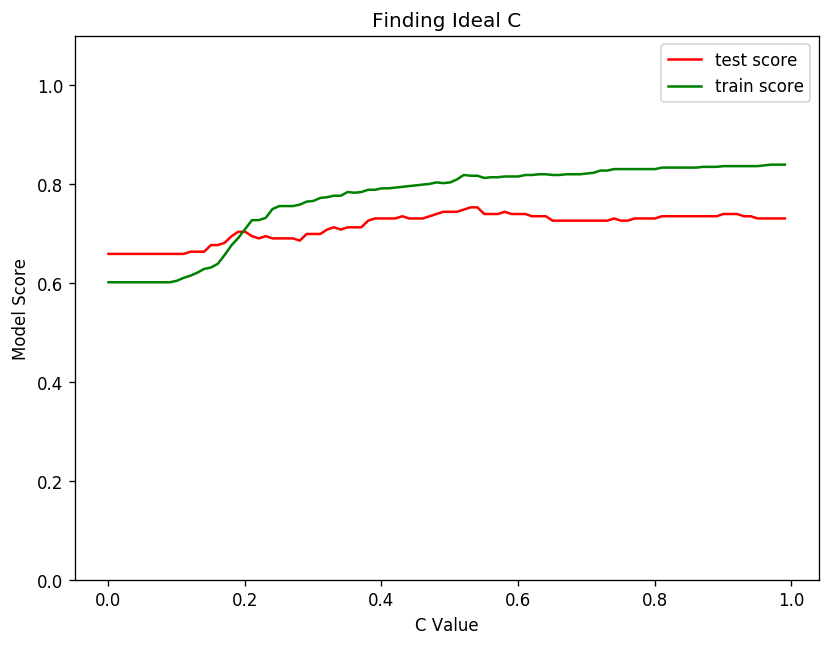

In [12]:
# Visialising the C and Score
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
plt.plot(z , score_test, color = 'red' , label = 'test score')
plt.plot(z , score_train, color = 'green' , label = 'train score')
plt.ylim(0, 1.1)
plt.xlabel( "C Value")
plt.ylabel('Model Score')
plt.title('Finding Ideal C')
plt.legend()

### Tuning the model with respect to Gamma

In [0]:
# takes model as input and returns  score of that model
def score(model):
  model.fit(train_x, train_y)
  k1 = model.score(test_x, test_y)
  k2 = model.score(train_x, train_y)
  return k1,k2

In [0]:
# Defining range of the parameter
z = range(1,2000,20)
z = [i/100000 for i in z]

score_test = []
score_train = []

for i in z:
  svc = SVC(gamma = i)
  k1, k2 = score(svc)
  score_test.append(k1)
  score_train.append(k2)  

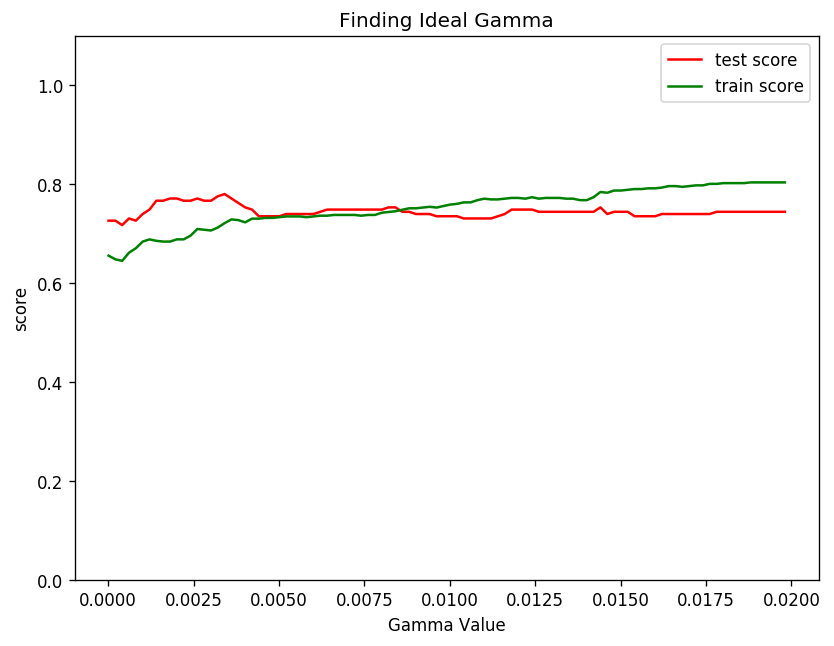

In [25]:
# Visialising the Gamma and score curve
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
plt.plot(z , score_test, color = 'red' , label = 'test score')
plt.plot(z , score_train, color = 'green' , label = 'train score')
plt.ylim(0, 1.1)
plt.xlabel( "Gamma Value")
plt.ylabel('score')
plt.title('Finding Ideal Gamma')
plt.legend()